In [1]:
import numpy as np
import time
import gc

In [2]:
from models.bayesian_vae_artificial import BayesianVAEArtificial

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
import tensorflow as tf

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
# 10 mc samples
# with variational ae kl
n_inputs = 784
n_neurons_encoder = [128, 64]
n_latent = 2
n_neurons_decoder = [64, 128]
vi = BayesianVAEArtificial('BAE_128_64_2_artificial',
                         n_inputs,
                         n_neurons_encoder,
                         n_latent,
                         n_neurons_decoder,
                         constant_prior=False)
vi.learn(learning_rate=0.001, epochs=30, batch_size=128, mc_samples=10)
print('Test Log-Likelihood: %.6f' % vi.benchmark())

   [29.4] Epoch: 01 | NELBO: 12332021.566434 | ELL: -224.090808 | KL: 7027.147895 | Val. ELL: -197.334305
   [31.1] Epoch: 02 | NELBO: 10676874.177156 | ELL: -194.121903 | KL: 169.521570 | Val. ELL: -190.930268
   [31.9] Epoch: 03 | NELBO: 10285706.995338 | ELL: -187.010912 | KL: 106.824252 | Val. ELL: -182.970421
   [32.5] Epoch: 04 | NELBO: 9900067.016317 | ELL: -179.999086 | KL: 117.280601 | Val. ELL: -176.598924
   [31.3] Epoch: 05 | NELBO: 9630538.303030 | ELL: -175.098320 | KL: 130.692432 | Val. ELL: -172.669844
   [31.5] Epoch: 06 | NELBO: 9434898.624709 | ELL: -171.541004 | KL: 143.391562 | Val. ELL: -168.964924
   [31.0] Epoch: 07 | NELBO: 9263276.967366 | ELL: -168.420570 | KL: 145.638707 | Val. ELL: -166.078508
   [31.5] Epoch: 08 | NELBO: 9120245.170163 | ELL: -165.819901 | KL: 150.598483 | Val. ELL: -163.709343
   [31.1] Epoch: 09 | NELBO: 9009584.448718 | ELL: -163.807746 | KL: 158.417179 | Val. ELL: -161.814357
   [31.5] Epoch: 10 | NELBO: 8892623.104895 | ELL: -161.6811

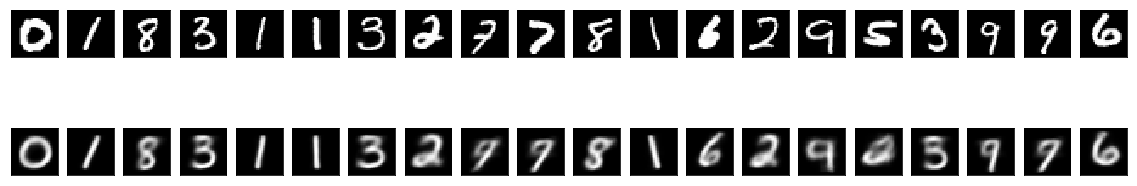

In [7]:
vi.plot_enc_dec(20)

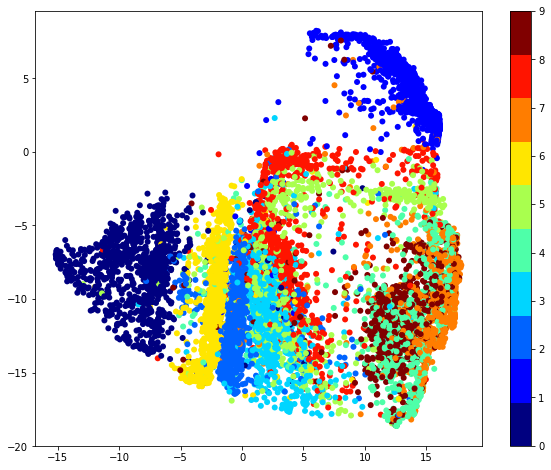

In [8]:
vi.plot_latent_repr()

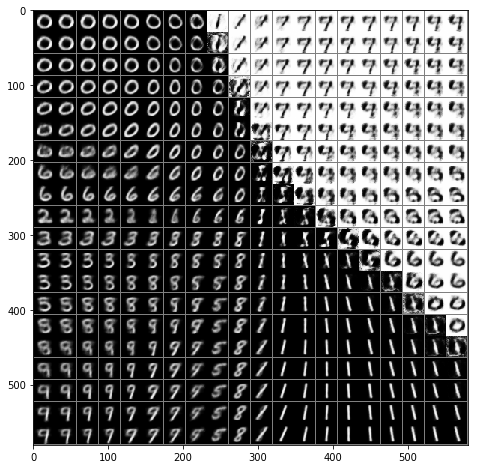

In [10]:
vi.plot_latent_recon(min_val=-15,max_val=15)

In [11]:
# uses gradient clipping
# 10 mc samples
# with variational ae kl
n_inputs = 784
n_neurons_encoder = [128, 64]
n_latent = 2
n_neurons_decoder = [64, 128]
vi = BayesianVAEArtificial('BAE_128_64_2_artificial',
                         n_inputs,
                         n_neurons_encoder,
                         n_latent,
                         n_neurons_decoder,
                         constant_prior=False)
vi.learn(learning_rate=0.001, epochs=30, batch_size=64, mc_samples=20)
print('Test Log-Likelihood: %.6f' % vi.benchmark())

   [66.1] Epoch: 01 | NELBO: 11447807.472643 | ELL: -208.075995 | KL: 3627.727003 | Val. ELL: -189.263878
   [67.2] Epoch: 02 | NELBO: 10009468.513388 | ELL: -181.987808 | KL: 139.032561 | Val. ELL: -175.208732
   [67.9] Epoch: 03 | NELBO: 9462589.507567 | ELL: -172.044172 | KL: 160.053597 | Val. ELL: -168.282625
   [68.6] Epoch: 04 | NELBO: 9110817.378347 | ELL: -165.648320 | KL: 159.766790 | Val. ELL: -161.631501
   [68.9] Epoch: 05 | NELBO: 8873294.089639 | ELL: -161.329716 | KL: 159.679642 | Val. ELL: -158.514836
   [68.4] Epoch: 06 | NELBO: 8710023.606519 | ELL: -158.361261 | KL: 154.237658 | Val. ELL: -156.351225
   [69.2] Epoch: 07 | NELBO: 8586706.928987 | ELL: -156.119276 | KL: 146.721107 | Val. ELL: -154.343147
   [69.6] Epoch: 08 | NELBO: 8499302.094878 | ELL: -154.530275 | KL: 136.947399 | Val. ELL: -152.285192
   [70.1] Epoch: 09 | NELBO: 8386804.796275 | ELL: -152.485036 | KL: 127.844403 | Val. ELL: -150.356113
   [70.2] Epoch: 10 | NELBO: 8230569.192666 | ELL: -149.64448

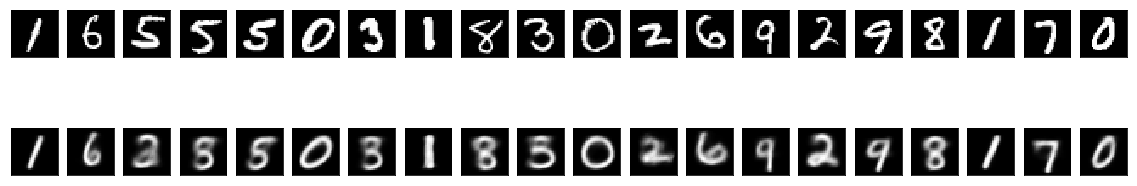

In [16]:
vi.plot_enc_dec(20, save=True)

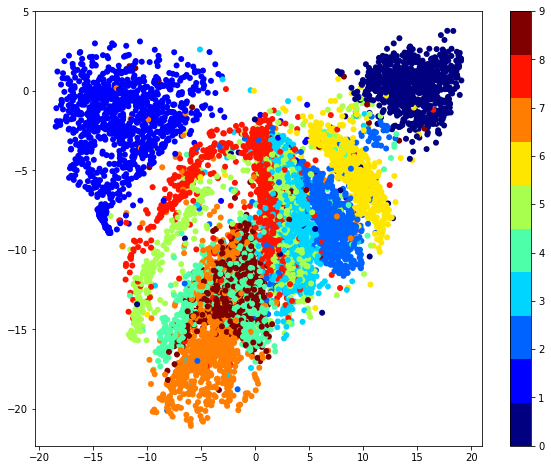

In [17]:
vi.plot_latent_repr(save=True)

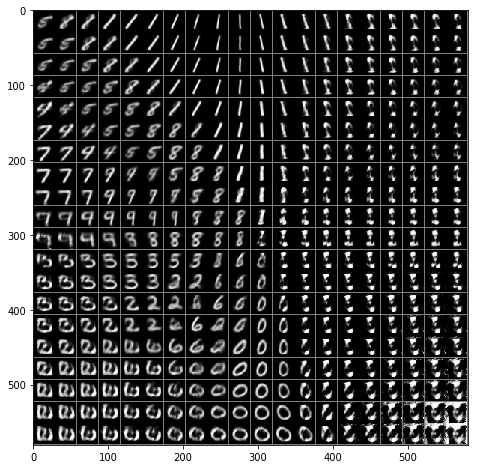

In [18]:
vi.plot_latent_recon(min_val=-20, max_val=20, save=True)